<a href="https://colab.research.google.com/github/prakharrathi25/Stock-Price-Predictor/blob/master/Alphabet_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reccurent Neural Networks using LSTMs

## Data Preprocessing

In [26]:
# Importing Necessary libraries 
import pandas as pd
import numpy as np 

# Data Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning 
import keras 

In [27]:
# Uploading File to colab ( comment it out if not using colab )
#from google.colab import files

#files.upload()

In [28]:
# Loading the data into a pandas data frame

train_data = pd.read_csv('./Data/Google_Stock_Price_Train.csv')
test_data = pd.read_csv('./Data/Google_Stock_Price_Test.csv')
print(train_data.shape, test_data.shape)

(1258, 6) (20, 6)


In [29]:
train_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


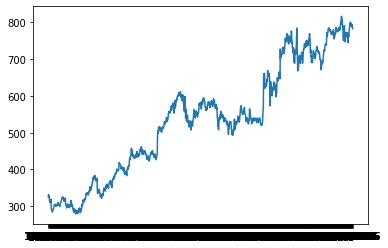

In [30]:
plt.plot(train_data['Date'], train_data['Open'])
plt.show()

In [31]:
# Creating an 2Dnumpy array of all the data of column open
train_set = train_data.iloc[:, 1:2].values
print(type(train_set))

<class 'numpy.ndarray'>


In [32]:
# Feature Scaling 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(train_set)
print(scaled_data)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [33]:
# Creating a data structure with 60 timesteps and 1 output

X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(scaled_data[i - 60 : i, 0])
#     X_train = scaled_data[i-60 : i, 0]
#     y_train = scaled_data[i:i+1, 0]
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [34]:
# Reshaping the data - used to add a new dimension to the data

'''Input shape: 3D tensor with shape (batch_size, timesteps, input_dim)'''

batch_size = X_train.shape[0]
timesteps = 60
no_of_predictors = 1 # input_dim
X_train = np.reshape(X_train, (batch_size, timesteps, no_of_predictors))
print(X_train.shape)
X_train

(1198, 60, 1)


array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

## Building the RNN

In [35]:
# Importing the Keras libraries
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [36]:
# Building our regressor
regressor = Sequential()

# Adding the first LSTM layer and a dropout regularisation layer
regressor.add(LSTM(units = 60, 
                  return_sequences = True, 
                  input_shape = (X_train.shape[1], 1)))

# Dropout regularisation 
regressor.add(Dropout(rate = 0.2)) # 20% dropout

In [37]:
# Adding the second LSTM layer and a dropout regularisation 
regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(rate = 0.2)) 
              

In [38]:
# Adding the third LSTM layer and dropout regularisation 
regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(rate = 0.2)) 

In [39]:
# Adding the fourth LSTM layer and dropout regularisation 
regressor.add(LSTM(units = 60, return_sequences = False))
regressor.add(Dropout(rate = 0.2)) 

In [40]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [41]:
# Compiling our RNN 
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [42]:
# Fitting the RNN to the Training Set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 6s 15ms/step - loss: 0.0393
Epoch 2/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0059
Epoch 3/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0048
Epoch 4/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0047
Epoch 5/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0041
Epoch 6/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0042
Epoch 7/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0041
Epoch 8/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0041
Epoch 9/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0039
Epoch 10/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0037
Epoch 11/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0041
Epoch 13/100
38/38 [=====

## Predicting the results on our test dataset

In [43]:
# Getting the real Google stock price of 2017 from the test set
real_stock_price = test_data.iloc[:, 1:2].values
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [45]:
# Getting the predicted stock price 

# Concatenate the train and test data of open stock price
total_data = pd.concat((train_data['Open'], test_data['Open']), axis = 0)
inputs = total_data[len(total_data) - len(test_data) - 60:].values

# Reshaping the input array 
inputs = inputs.reshape(-1, 1)

# Scaling the input data
inputs = scaler.transform(inputs)
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [46]:
# Making our predictions 

X_test = []
for i in range(60, 80): 
    X_test.append(inputs[i - 60 : i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test)

[[[0.9299055 ]
  [0.93113327]
  [0.92750577]
  ...
  [0.95725128]
  [0.93796041]
  [0.93688146]]

 [[0.93113327]
  [0.92750577]
  [0.94415507]
  ...
  [0.93796041]
  [0.93688146]
  [0.92955205]]

 [[0.92750577]
  [0.94415507]
  [0.93876032]
  ...
  [0.93688146]
  [0.92955205]
  [0.94731751]]

 ...

 [[0.96054394]
  [0.9371419 ]
  [0.92841729]
  ...
  [1.01045465]
  [1.02407173]
  [1.03930724]]

 [[0.9371419 ]
  [0.92841729]
  [0.90804747]
  ...
  [1.02407173]
  [1.03930724]
  [1.03354044]]

 [[0.92841729]
  [0.90804747]
  [0.8771858 ]
  ...
  [1.03930724]
  [1.03354044]
  [0.99624228]]]


In [47]:
# Making predictions
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
predicted_stock_price

1/1 [==============================] - 1s 1s/step


array([[774.6921 ],
       [772.0127 ],
       [773.4901 ],
       [775.0438 ],
       [778.61096],
       [784.80304],
       [789.29956],
       [790.01825],
       [790.00616],
       [790.1221 ],
       [790.3202 ],
       [790.2676 ],
       [790.1636 ],
       [790.8872 ],
       [791.81396],
       [797.44305],
       [804.4105 ],
       [811.0292 ],
       [813.1752 ],
       [806.45496]], dtype=float32)

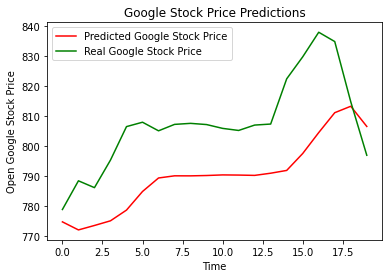

In [48]:
# Visualising the stock price 
plt.plot(predicted_stock_price, color = 'r', label = 'Predicted Google Stock Price')
plt.plot(real_stock_price, color = 'g', label = 'Real Google Stock Price')

plt.title('Google Stock Price Predictions')

plt.xlabel('Time')
plt.ylabel('Open Google Stock Price')
plt.legend()
plt.show()

In [49]:
# Measuring the Error
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae_acc = mean_absolute_error(y_true = real_stock_price, y_pred = predicted_stock_price)
mse_acc = mean_squared_error(y_true = real_stock_price, y_pred = predicted_stock_price)
print("Mean Absolute Error: {}".format(mae_acc))
print("Mean Suared Error: {}".format(mse_acc))

Mean Absolute Error: 18.282288208007806
Mean Suared Error: 401.5925152078807
